In [186]:
#load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install seaborn


     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
     ----- ------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
     --------------- ---------------------- 122.9/294.9 kB 1.2 MB/s eta 0:00:01
     -------------------------- ----------- 204.8/294.9 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Guduri Prasanna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [85]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [187]:
cpi_data=pd.read_csv(r"C:\Users\Guduri Prasanna\Downloads\meghna\meghna\All_India_Index_july2019_20Aug2020_dec20_2.csv")

In [188]:
cpi_data

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,Urban,2023,March,174.7,212.2,177.2,177.9,172.2,172.1,175.9,...,173.5,182.6,169.2,180.8,159.8,168.4,172.5,181.5,170.0,176.3
365,Rural+Urban,2023,March,174.4,207.7,175.2,177.3,179.2,169.5,152.8,...,173.5,181.9,174.2,184.4,164.2,170.3,175.0,181.0,174.1,177.2
366,Rural,2023,April,173.3,206.9,167.9,178.2,178.5,173.7,142.8,...,-,181.5,179.1,187.2,169.4,173.2,179.4,183.8,178.9,178.8
367,Urban,2023,April,174.8,213.7,172.4,178.8,168.7,179.2,179.9,...,175.2,182.1,169.6,181.5,160.1,168.8,174.2,184.4,170.9,177.4


In [189]:
cpi_data.shape

(369, 30)

In [199]:
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               369 non-null    int32  
 1   Year                                 369 non-null    int64  
 2   Month                                369 non-null    int64  
 3   Cereals and products                 369 non-null    float64
 4   Meat and fish                        369 non-null    float64
 5   Egg                                  369 non-null    float64
 6   Milk and products                    369 non-null    float64
 7   Oils and fats                        369 non-null    float64
 8   Fruits                               369 non-null    float64
 9   Vegetables                           369 non-null    float64
 10  Pulses and products                  369 non-null    float64
 11  Sugar and Confectionery         

In [191]:
missing_values=cpi_data.isnull().sum()

In [192]:
missing_values

Sector                                   0
Year                                     0
Month                                    0
Cereals and products                     3
Meat and fish                            6
Egg                                      3
Milk and products                        3
Oils and fats                            3
Fruits                                   3
Vegetables                               3
Pulses and products                      3
Sugar and Confectionery                  3
Spices                                   3
Non-alcoholic beverages                  3
Prepared meals, snacks, sweets etc.      6
Food and beverages                       3
Pan, tobacco and intoxicants             6
Clothing                                 6
Footwear                                 6
Clothing and footwear                    6
Housing                                122
Fuel and light                           3
Household goods and services             6
Health     

In [197]:
import pandas as pd

# Assuming cpi_data is your DataFrame
# Replace non-numeric values with NaN (missing values)
cpi_data['Housing'] = pd.to_numeric(cpi_data['Housing'], errors='coerce')

# Convert the column to float
cpi_data['Housing'] = cpi_data['Housing'].astype(float)


In [198]:
# Import missing values with linear interpolation
# columns_with_missing = ['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables', 'Pulses and products', 'Sugar and Confectionery', 'Spices', 'Non-alcoholic beverages', 'Prepared meals, snacks, sweets', 'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing', 'Footwear', 'Clothing and footwear', 'Housing', 'Fuel and light', 'Household goods and services', 'Health', 'Transport and communication', 'Recreation and amusement', 'Education', 'Personal care and effects', 'Miscellaneous', 'General index']
columns_with_missing=cpi_data.columns
for column in columns_with_missing:
    cpi_data[column] = cpi_data[column].interpolate(method='linear', limit_direction='both')

# Verify that missing values have been imputed
print(cpi_data[columns_with_missing].isnull().sum())


Sector                                 0
Year                                   0
Month                                  0
Cereals and products                   0
Meat and fish                          0
Egg                                    0
Milk and products                      0
Oils and fats                          0
Fruits                                 0
Vegetables                             0
Pulses and products                    0
Sugar and Confectionery                0
Spices                                 0
Non-alcoholic beverages                0
Prepared meals, snacks, sweets etc.    0
Food and beverages                     0
Pan, tobacco and intoxicants           0
Clothing                               0
Footwear                               0
Clothing and footwear                  0
Housing                                0
Fuel and light                         0
Household goods and services           0
Health                                 0
Transport and co

In [200]:
#label encoding
label_encoder=LabelEncoder()
cpi_data['Sector']=label_encoder.fit_transform(cpi_data['Sector'])

In [201]:
cpi_data['Month']=label_encoder.fit_transform(cpi_data['Month'])

cpi_data['Housing'].fillna(cpi_data.mean(),inplace=True)

In [202]:
cpi_data.describe()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,...,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,1.000000,2017.666667,5.972900,136.479268,156.150678,140.598103,140.121545,131.861382,140.631301,155.702033,...,138.988347,136.197832,136.576152,138.266531,127.001084,133.823577,141.126016,133.169648,134.119241,139.423848
std,0.817605,3.001811,4.075953,14.654751,32.922434,22.338231,18.054384,29.768700,17.141468,27.864892,...,20.939571,21.864716,18.994153,23.366205,18.810447,19.848136,20.987896,22.650325,20.455892,20.028377
min,0.000000,2013.000000,0.000000,107.500000,106.300000,102.700000,103.600000,101.100000,102.300000,101.400000,...,100.300000,105.400000,104.800000,104.000000,103.200000,102.900000,103.500000,102.100000,103.700000,104.000000
25%,0.000000,2015.000000,3.000000,124.200000,130.400000,122.100000,128.300000,110.500000,130.400000,135.100000,...,119.900000,116.500000,121.000000,118.600000,111.700000,117.300000,124.400000,112.500000,116.700000,123.600000
50%,1.000000,2018.000000,5.000000,135.900000,144.200000,135.500000,141.000000,120.500000,141.300000,153.600000,...,141.300000,132.200000,135.200000,133.600000,119.800000,130.200000,140.200000,127.800000,130.200000,137.500000
75%,2.000000,2020.000000,9.000000,146.400000,190.300000,159.200000,153.900000,139.800000,152.000000,171.200000,...,156.400000,148.400000,150.200000,156.325000,140.400000,149.500000,159.700000,155.200000,150.000000,155.400000
max,2.000000,2023.000000,13.000000,174.800000,223.400000,197.000000,178.800000,209.900000,179.500000,245.300000,...,175.200000,183.200000,179.100000,187.200000,169.400000,173.200000,179.400000,184.400000,178.900000,178.800000


In [118]:
# Univariate Analysis
# Summary statistics for each column
print("\nSummary Statistics:")
print(cpi_data.describe())



Summary Statistics:
           Sector         Year       Month  Cereals and products  \
count  369.000000   369.000000  369.000000            369.000000   
mean     1.000000  2017.666667    5.972900            136.479268   
std      0.817605     3.001811    4.075953             14.654751   
min      0.000000  2013.000000    0.000000            107.500000   
25%      0.000000  2015.000000    3.000000            124.200000   
50%      1.000000  2018.000000    5.000000            135.900000   
75%      2.000000  2020.000000    9.000000            146.400000   
max      2.000000  2023.000000   13.000000            174.800000   

       Meat and fish         Egg  Milk and products  Oils and fats  \
count     369.000000  369.000000         369.000000     369.000000   
mean      156.150678  140.598103         140.121545     131.861382   
std        32.922434   22.338231          18.054384      29.768700   
min       106.300000  102.700000         103.600000     101.100000   
25%       130.40

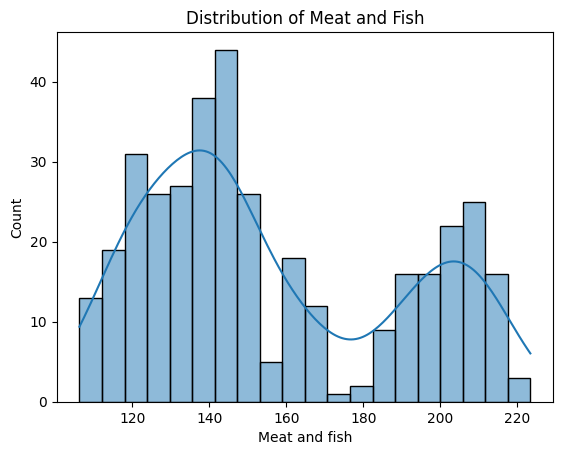

In [203]:

# Distribution of Meat and fishplt.figure(figsize=(12, 6))
sns.histplot(cpi_data['Meat and fish'], bins=20, kde=True)
plt.title('Distribution of Meat and Fish')
plt.show()


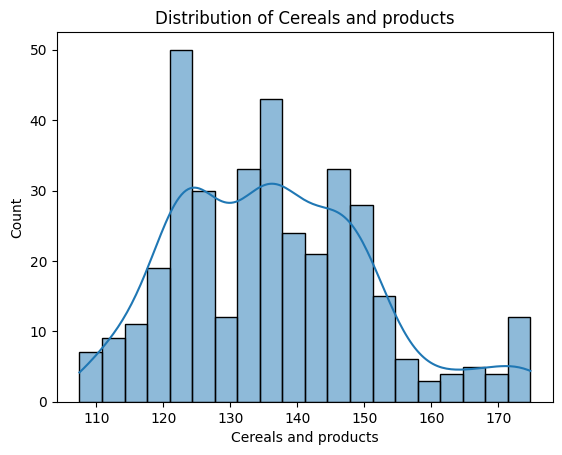

In [204]:

# Distribution of Cereals and productsplt.figure(figsize=(12, 6))
sns.histplot(cpi_data['Cereals and products'], bins=20, kde=True)
plt.title('Distribution of Cereals and products')
plt.show()


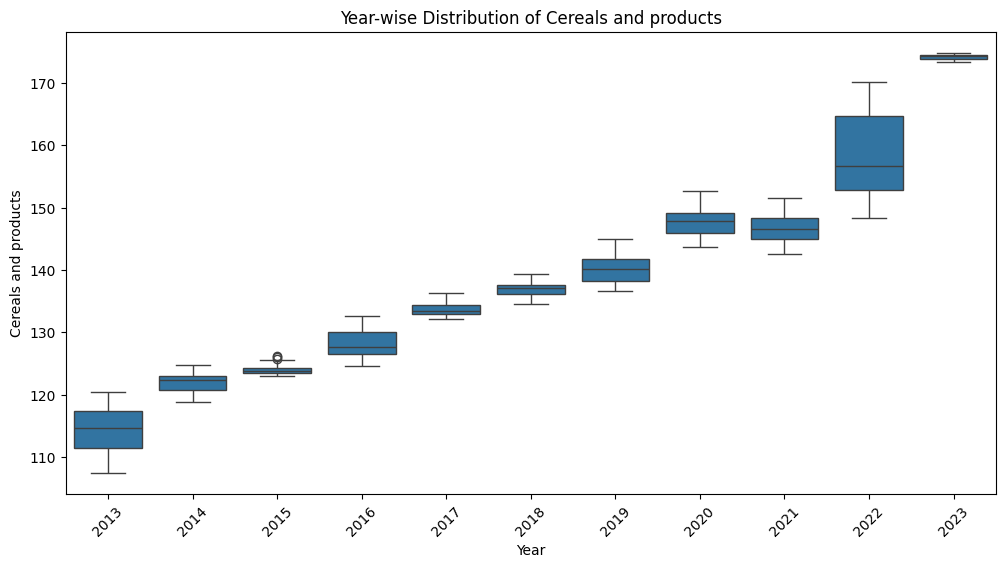

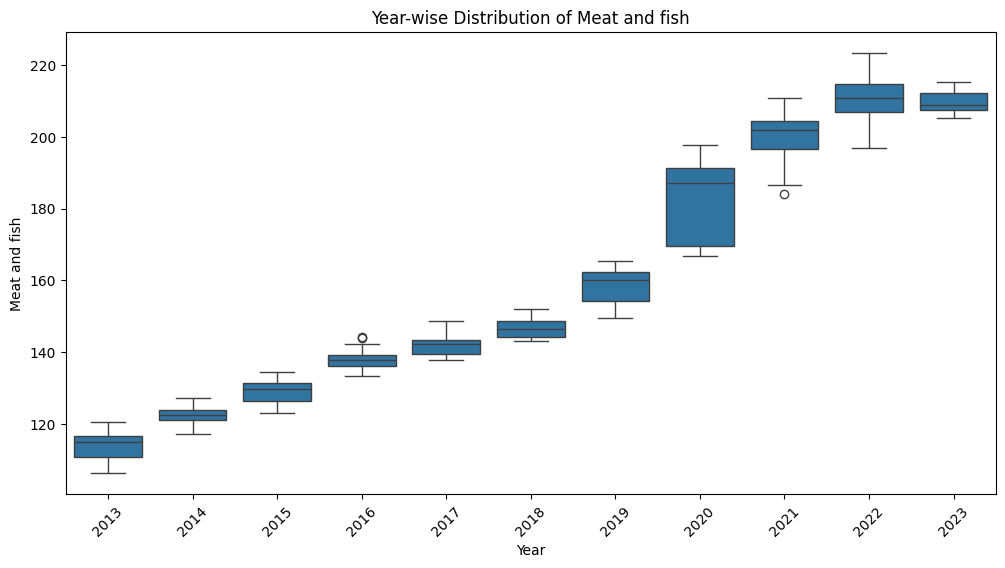

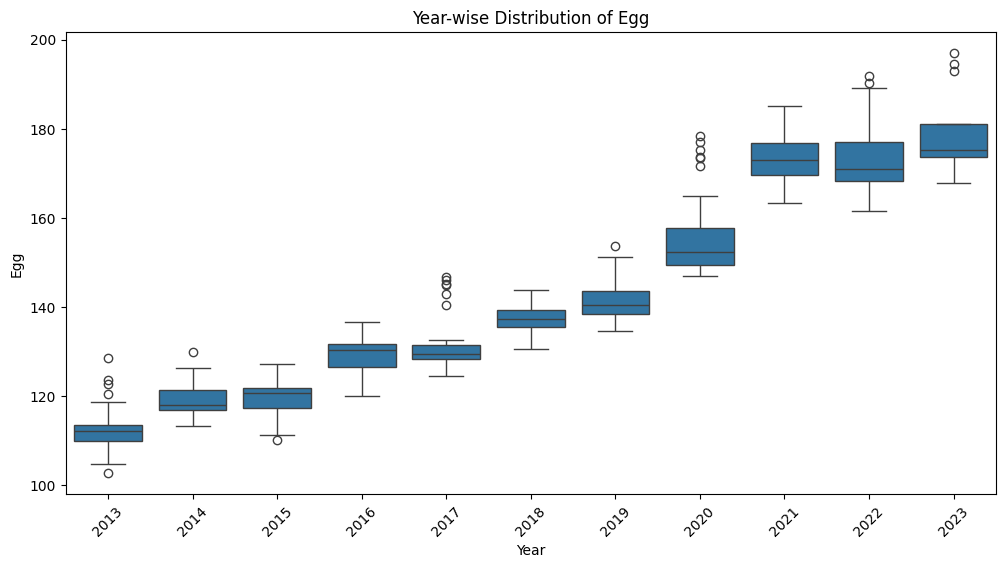

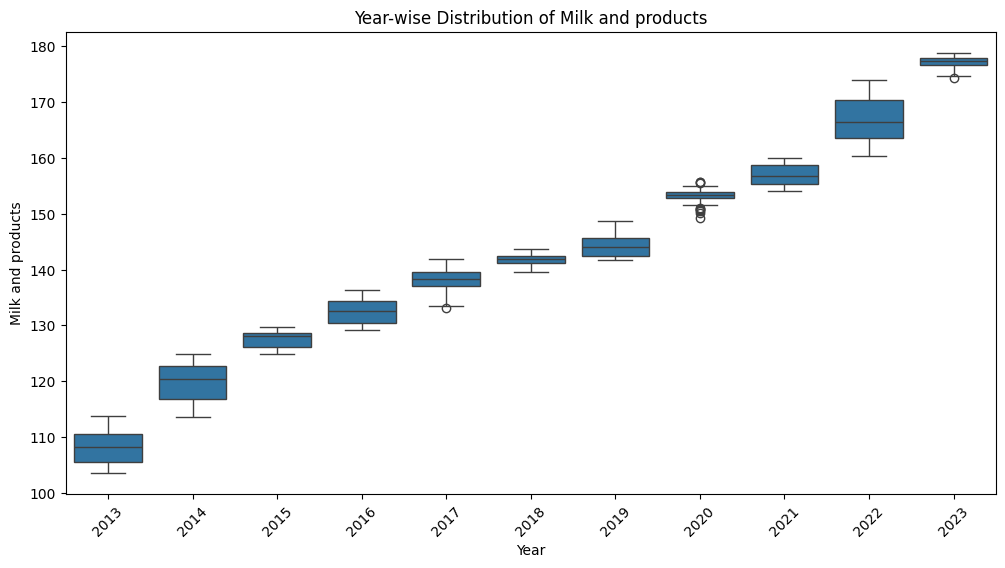

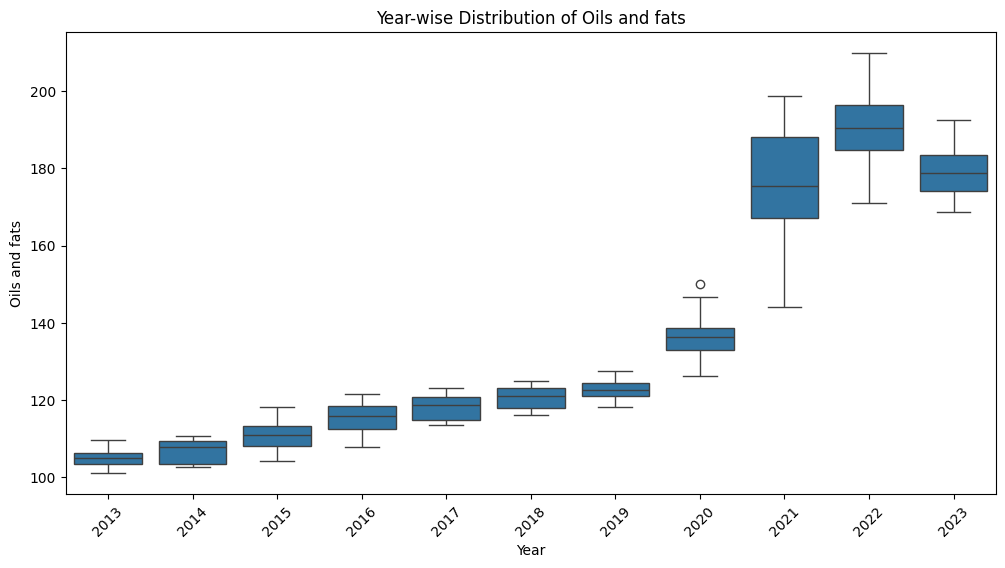

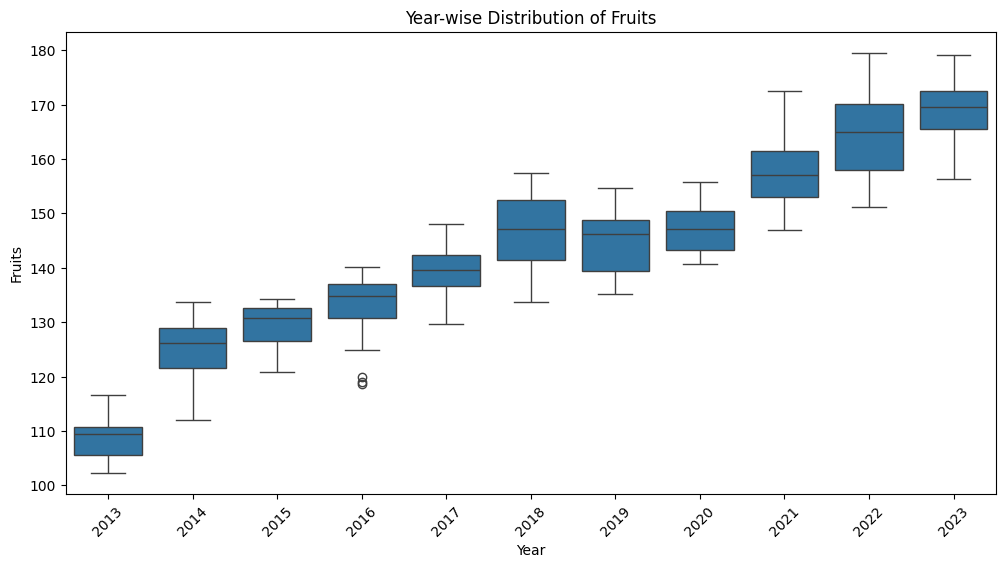

In [205]:
# Bivariate Analysis
# Relationship between Year and Cereals and products
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Cereals and products', data=cpi_data)
plt.title('Year-wise Distribution of Cereals and products')
plt.xticks(rotation=45)
plt.show()

# Relationship between Year and Meat and fish
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Meat and fish', data=cpi_data)
plt.title('Year-wise Distribution of Meat and fish')
plt.xticks(rotation=45)
plt.show()

# Relationship between Year and Egg
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Egg', data=cpi_data)
plt.title('Year-wise Distribution of Egg')
plt.xticks(rotation=45)
plt.show()

# Relationship between Year and Milk and products
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Milk and products', data=cpi_data)
plt.title('Year-wise Distribution of Milk and products')
plt.xticks(rotation=45)
plt.show()

# Relationship between Year and Oils and fats
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Oils and fats', data=cpi_data)
plt.title('Year-wise Distribution of Oils and fats')
plt.xticks(rotation=45)
plt.show()

# Relationship between Year and Fruits
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Fruits', data=cpi_data)
plt.title('Year-wise Distribution of Fruits')
plt.xticks(rotation=45)
plt.show()




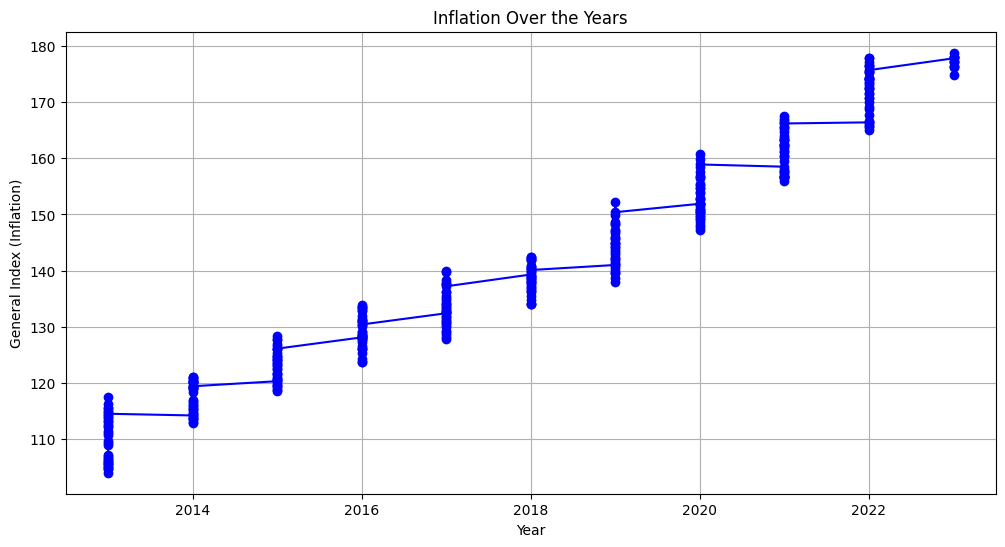

In [206]:
import matplotlib.pyplot as plt

# Line plot for General Index (Inflation) over the years
plt.figure(figsize=(12, 6))
plt.plot(cpi_data['Year'], cpi_data['General index'], marker='o', linestyle='-', color='b')
plt.title('Inflation Over the Years')
plt.xlabel('Year')
plt.ylabel('General Index (Inflation)')
plt.grid(True)
plt.show()


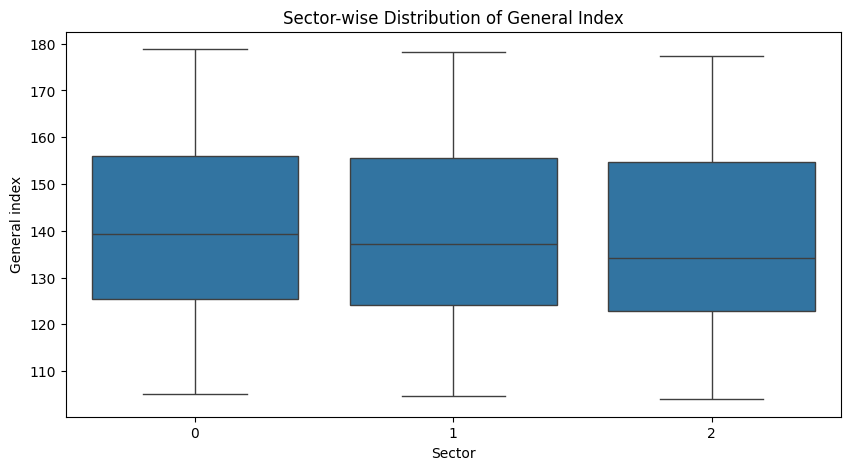

In [207]:
# Relationship between Sector and General Index
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sector', y='General index', data=cpi_data)
plt.title('Sector-wise Distribution of General Index')
plt.show()

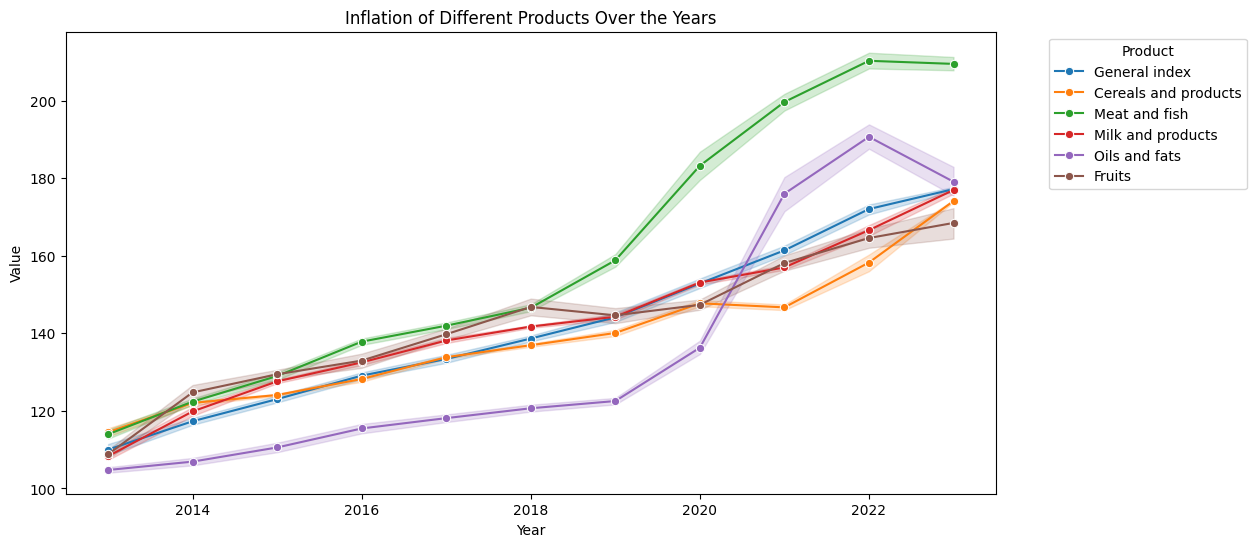

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the analysis
selected_columns = ['Year', 'General index', 'Cereals and products', 'Meat and fish', 'Milk and products', 'Oils and fats', 'Fruits']

# Create a new DataFrame with selected columns
selected_data = cpi_data[selected_columns]

# Melt the DataFrame to have 'Year' as the x-axis, and 'value' as the y-axis
melted_data = pd.melt(selected_data, id_vars=['Year'], var_name='Product', value_name='Value')

# Line plot for inflation of different products over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Product', data=melted_data, marker='o')
plt.title('Inflation of Different Products Over the Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [209]:
cpi_data.fillna(cpi_data.mean(),inplace=True)
cpi_data.isnull().sum()

Sector                                 0
Year                                   0
Month                                  0
Cereals and products                   0
Meat and fish                          0
Egg                                    0
Milk and products                      0
Oils and fats                          0
Fruits                                 0
Vegetables                             0
Pulses and products                    0
Sugar and Confectionery                0
Spices                                 0
Non-alcoholic beverages                0
Prepared meals, snacks, sweets etc.    0
Food and beverages                     0
Pan, tobacco and intoxicants           0
Clothing                               0
Footwear                               0
Clothing and footwear                  0
Housing                                0
Fuel and light                         0
Household goods and services           0
Health                                 0
Transport and co

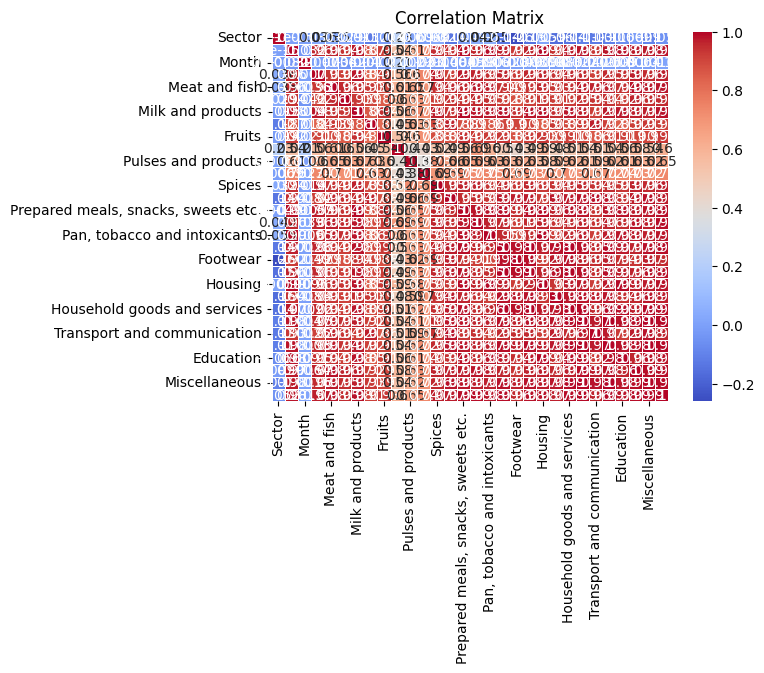

In [210]:
# Multivariate Analysis
# Correlation Matrix

correlation_matrix = cpi_data.corr()

#Heatmap of the correlation matrixplt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

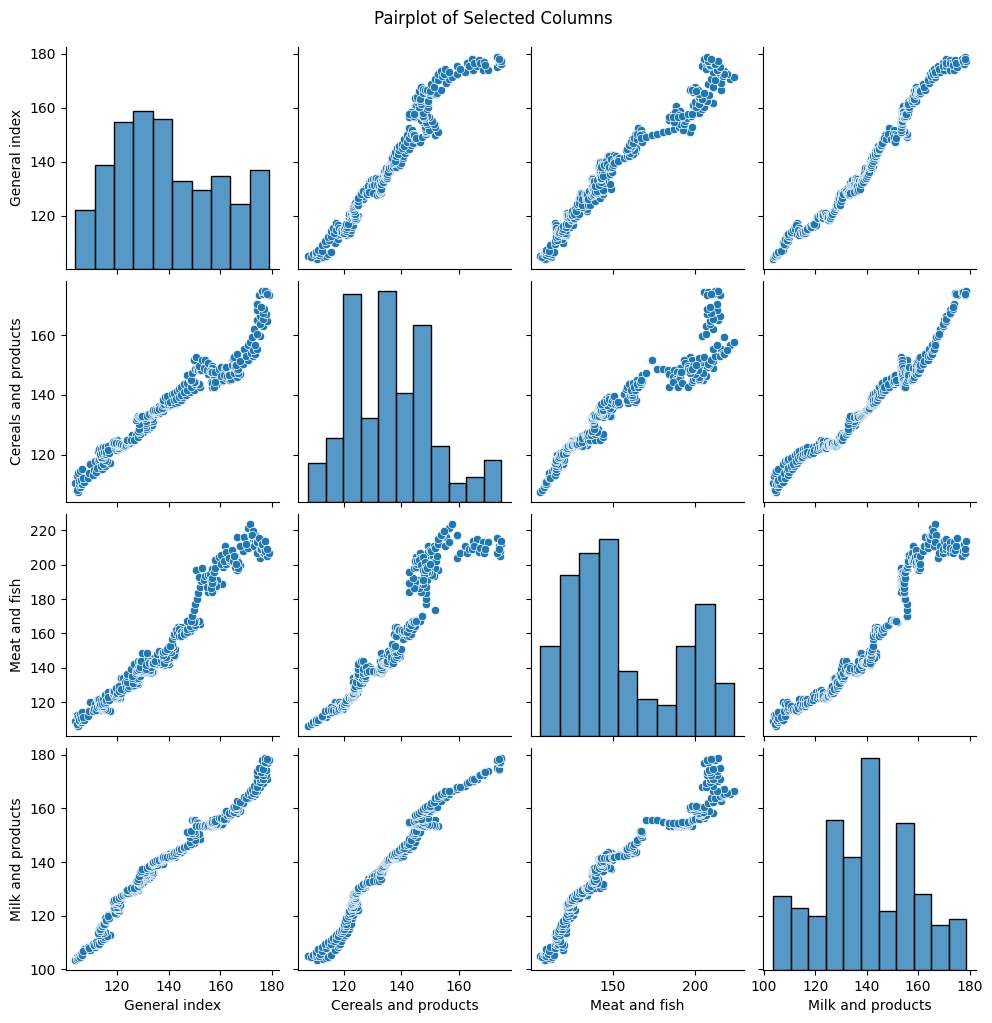

In [211]:
# Pairplot for selected columns
selected_columns = ['General index', 'Cereals and products', 'Meat and fish', 'Milk and products']
sns.pairplot(cpi_data[selected_columns])
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

In [215]:
# Assuming cpi_data is your DataFrame
columns_to_extract = ['Milk and products', 'Prepared meals, snacks, sweets etc.', 'Health', 'Personal care and effects', 'Miscellaneous', 'Meat and fish', 'Food and beverages','General index']
extracted_data = cpi_data[columns_to_extract]


In [216]:
# X should contain your feature columns,and y should be your target variable
X=extracted_data.drop('General index',axis=1)
y=extracted_data['General index']

In [217]:
#split the data into a training set and a test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X

,Milk and products,"Prepared meals, snacks, sweets etc.",Health,Personal care and effects,Miscellaneous,Meat and fish,Food and beverages
0,104.9,106.7,104.0,104.7,104.0,106.3,105.5
1,103.6,107.9,104.1,104.3,103.7,109.1,105.9
2,104.4,107.3,104.0,104.5,103.9,107.3,105.6
3,105.4,107.7,104.4,104.6,104.4,108.7,106.3
4,104.0,109.0,104.7,104.3,104.3,112.9,107.2
...,...,...,...,...,...,...,...
364,177.9,196.6,180.8,181.5,170.0,212.2,180.8
365,177.3,193.0,184.4,181.0,174.1,207.7,177.0
366,178.2,190.5,187.2,183.8,178.9,206.9,175.5
367,178.8,197.0,181.5,184.4,170.9,213.7,182.1


In [218]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
X_test.isna().sum()


(295, 7) (74, 7) (295,) (74,)


Milk and products                      0
Prepared meals, snacks, sweets etc.    0
Health                                 0
Personal care and effects              0
Miscellaneous                          0
Meat and fish                          0
Food and beverages                     0
dtype: int64

In [219]:
#fit each model to the training data
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)
train_pred_lr=linear_regression.predict(X_train)
test_pred_lr=linear_regression.predict(X_test)
#Evaluate the model on the training set
train_rmse_knn=np.sqrt(mean_squared_error(y_train,train_pred_lr))
train_r2=r2_score(y_train,train_pred_lr)
#Evaluate the model on the testing set
test_rmse_knn=np.sqrt(mean_squared_error(y_test,test_pred_lr))
test_r2=r2_score(y_test,test_pred_lr)
print("Linear Regression Training RMSE:",train_rmse_knn)
print("Linear Regression Test RMSE:",test_rmse_knn)
print("Training R-squared:",train_r2)
print("Training R-squared:",test_r2)

Linear Regression Training RMSE: 0.6225582147511882
Linear Regression Test RMSE: 0.7152951164538413
Training R-squared: 0.9990212814653134
Training R-squared: 0.9987388130217106


In [220]:
random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)
train_pred_rf=random_forest_regressor.predict(X_train)
test_pred_rf=random_forest_regressor.predict(X_test)
#Evaluate the model on the training set
train_rmse_knn=np.sqrt(mean_squared_error(y_train,train_pred_rf))
train_r2=r2_score(y_train,train_pred_rf)
#Evaluate the model on the testing set
test_rmse_knn=np.sqrt(mean_squared_error(y_test,test_pred_rf))
test_r2=r2_score(y_test,test_pred_rf)
print("RandomForest Regressor Training RMSE:",train_rmse_knn)
print("RandomForestRegressor Test RMSE:",test_rmse_knn)
print("Training R-squared:",train_r2)
print("Testing R-squared:",test_r2)

RandomForest Regressor Training RMSE: 0.2926548645310052
RandomForestRegressor Test RMSE: 0.7028287285903528
Training R-squared: 0.9997837234806897
Testing R-squared: 0.9987823906662893


In [221]:
adaboost_regressor=AdaBoostRegressor()
adaboost_regressor.fit(X_train,y_train)
train_pred_ab=adaboost_regressor.predict(X_train)
test_pred_ab=adaboost_regressor.predict(X_test)
#Evaluate the model on the training set
train_rmse_knn=np.sqrt(mean_squared_error(y_train,train_pred_ab))
train_r2=r2_score(y_train,train_pred_ab)
#Evaluate the model on the testing set
test_rmse_knn=np.sqrt(mean_squared_error(y_test,test_pred_ab))
test_r2=r2_score(y_test,test_pred_ab)
print("AdaBoost Regressor Training RMSE:",train_rmse_knn)
print("AdaBoost Regressor Test RMSE:",test_rmse_knn)
print("Training R-squared:",train_r2)
print("Testing R-squared:",test_r2)

AdaBoost Regressor Training RMSE: 0.9717772852863878
AdaBoost Regressor Test RMSE: 1.125853308860066
Training R-squared: 0.9976153131122862
Testing R-squared: 0.9968755572230442


In [222]:
gradient_boosting=GradientBoostingRegressor()
gradient_boosting.fit(X_train,y_train)
train_pred_gb=gradient_boosting.predict(X_train)
test_pred_gb=gradient_boosting.predict(X_test)
#Evaluate the model on the training set
train_rmse_gb=np.sqrt(mean_squared_error(y_train,train_pred_gb))
train_r2=r2_score(y_train,train_pred_gb)
#Evaluate the model on the testing set
test_rmse_gb=np.sqrt(mean_squared_error(y_test,test_pred_gb))
test_r2=r2_score(y_test,test_pred_gb)
print("Gradient Boosting Training RMSE:",train_rmse_gb)
print("Gradient Boosting Testing RMSE:",test_rmse_gb)
print("Training R-squared:",train_r2)


print("Testing R-squared:",test_r2)

Gradient Boosting Training RMSE: 0.2601393806723281
Gradient Boosting Testing RMSE: 0.7199618550507886
Training R-squared: 0.9998291125848363
Testing R-squared: 0.9987223028306884


In [223]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor()
knn_regressor.fit(X_train,y_train)
train_pred_knn=knn_regressor.predict(X_train)
train_pred_knn=knn_regressor.predict(X_train)
test_pred_knn=knn_regressor.predict(X_test)
#Evaluate the model on the training set
train_rmse_knn=np.sqrt(mean_squared_error(y_train,train_pred_knn))
train_r2=r2_score(y_train,train_pred_knn)
#Evaluate the model on the testing set
test_rmse_knn=np.sqrt(mean_squared_error(y_test,test_pred_knn))
test_r2=r2_score(y_test,test_pred_knn)
print("KNN Training RMSE:",train_rmse_knn)
print("KNN Test RMSE:",test_rmse_knn)
print("Training R-squared:",train_r2)
print("Testing R-squared:",test_r2)

KNN Training RMSE: 0.6330284859243688
KNN Test RMSE: 0.7001936537740397
Training R-squared: 0.9989880841843953
Testing R-squared: 0.9987915037740938


In [224]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_train,y_train)
train_pred_lasso=lasso_model.predict(X_train)
test_pred_lasso=lasso_model.predict(X_test)
#Evaluate the model on the training set
train_rmse_lasso=np.sqrt(mean_squared_error(y_train,train_pred_lasso))
train_r2=r2_score(y_train,train_pred_lasso)
#Evaluate the model on the testing set
test_r2=r2_score(y_test,test_pred_lasso)
test_rmse_lasso=np.sqrt(mean_squared_error(y_test,test_pred_lasso))
print("Lasso Training RMSE:",train_rmse_lasso)
print("Lasso Test RMSE:",test_rmse_lasso)
print("Training R-squared:",train_r2)
print("Testing R-squared:",test_r2)

Lasso Training RMSE: 0.7019916521510916
Lasso Test RMSE: 0.7931704703957566
Training R-squared: 0.9987555949292048
Testing R-squared: 0.9984492491342541


In [225]:
#specify the file path where to save th model
model_file_path='Lasso_regression_model.joblib'

#save the model to the specified file
with open(model_file_path,'wb') as model_file:
     pickle.dump(lasso_model,model_file)
print(f"Lasso Regression model saved to {model_file_path}")

Lasso Regression model saved to Lasso_regression_model.joblib


In [240]:
# Assuming X_test 	contains the test data with the correct column names
predictions = lasso_model.predict(X_test)
predictions
X_test

,Milk and products,"Prepared meals, snacks, sweets etc.",Health,Personal care and effects,Miscellaneous,Meat and fish,Food and beverages
326,160.7,178.0,172.2,164.4,163.5,200.6,166.2
33,113.8,116.8,110.1,108.1,110.1,115.9,118.7
15,108.3,111.0,106.3,102.5,105.5,112.1,110.6
345,169.5,184.8,180.2,170.8,173.1,206.7,175.5
57,121.9,121.7,114.0,109.4,113.5,122.8,125.3
...,...,...,...,...,...,...,...
82,126.3,129.5,114.6,111.8,114.2,128.2,124.6
94,128.0,131.7,116.6,112.0,116.2,131.7,131.1
195,143.2,154.3,138.4,131.4,135.6,148.1,140.0
310,159.1,175.1,162.8,159.6,156.0,207.4,167.3


In [234]:
predictions=lasso_model.predict(input_feature)

In [232]:
# Assuming X_train contains your training data
input_feature = X_train.sample(1)  # Select a single sample from the training data
print(list(input_feature))
# Now you can use lasso_model.predict(input_feature)
predictions = lasso_model.predict(input_feature)

# Print the predictions
print(predictions)


['Milk and products', 'Prepared meals, snacks, sweets etc.', 'Health', 'Personal care and effects', 'Miscellaneous', 'Meat and fish', 'Food and beverages']
[152.32577784]


In [233]:
print("predicted output:",predictions[0])

predicted output: 152.32577783623327


In [65]:
pickle.dump(rf,open('model.pkl','wb'))

In [64]:
from sklearn.ensemble import RandomForestRegressor
import pickle

# Assuming X_train and y_train are defined and contain your training data
# Create and train the RandomForestRegressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Save the trained model using pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

In [243]:
from flask import request
import numpy as np
import pandas as pd
import joblib
# Assuming you have the model loaded in this notebook
# model = joblib.load('Lasso_regression_model.joblib')

# Sample input values
request_form_values = {'milk': '3', 'prepared': '9', 'health': '2', 'personal': '5', 'miscellaneous': '8', 'meat_egg': '4', 'food_beverages': '2'}

# Extracting input features and filtering out empty strings
input_feature = [float(x) for x in request_form_values.values() if x.strip()]
if not input_feature:
    print("Please provide valid input values")

x = [np.array(input_feature)]
print("Input features:", input_feature)

# Assuming the names of the features
names = ["Milk and products", "Prepared meals, snacks, sweets etc.", "Health", "Personal care and effects", "Miscellaneous", "Meat and fish", "Food and beverages"]

# Creating a DataFrame from the input features
data = pd.DataFrame(x, columns=names)
print("Input DataFrame:")
print(data)
model=joblib.load('Lasso_regression_model.joblib')
# Assuming you have the model loaded and ready for prediction
pred = model.predict(data)
print("Predictions:", pred)


Input features: [3.0, 9.0, 2.0, 5.0, 8.0, 4.0, 2.0]
Input DataFrame:
   Milk and products  Prepared meals, snacks, sweets etc.  Health  \
0                3.0                                  9.0     2.0   

   Personal care and effects  Miscellaneous  Meat and fish  Food and beverages  
0                        5.0            8.0            4.0                 2.0  
Predictions: [7.18031759]
